<h2>Libraries</h2>

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

<h2>Dataset</h2>

In [23]:
# Define directories for the data
train_dir = r'C:\Users\Sailesh\Files\Coding\Python\Projects\ChestXRay\Dataset\train'
test_dir = r'C:\Users\Sailesh\Files\Coding\Python\Projects\ChestXRay\Dataset\test'

# Data Augmentation for training and normal rescaling for testing
train_datagen = ImageDataGenerator( 
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directories, apply data augmentation to training set
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

# Load images from test directory (no augmentation)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [3]:
# Build the CNN model
model = Sequential()

# First convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the data for fully connected layers
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout to prevent overfitting

# Output layer
model.add(Dense(1, activation='sigmoid'))  # For binary classification (Normal or Pneumonia)

# Compile the model with the correct argument
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\Sailesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = test_generator.samples // test_generator.batch_size

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=test_generator,
    validation_steps=validation_steps
)


Epoch 1/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 64s 243ms/step - accuracy: 0.9235 - loss: 0.1936 - val_accuracy: 0.7984 - val_loss: 0.5205
Epoch 2/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 87us/step - accuracy: 1.0000 - loss: 0.0450 - val_accuracy: 0.8000 - val_loss: 0.4148
Epoch 3/10


C:\Users\Sailesh\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


261/261 ━━━━━━━━━━━━━━━━━━━━ 64s 241ms/step - accuracy: 0.9233 - loss: 0.1934 - val_accuracy: 0.8742 - val_loss: 0.3508
Epoch 4/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 87us/step - accuracy: 0.9500 - loss: 0.1200 - val_accuracy: 0.8000 - val_loss: 0.3363
Epoch 5/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 75s 283ms/step - accuracy: 0.9341 - loss: 0.1813 - val_accuracy: 0.8871 - val_loss: 0.3221
Epoch 6/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 107us/step - accuracy: 0.9500 - loss: 0.1405 - val_accuracy: 1.0000 - val_loss: 0.0029
Epoch 7/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 73s 275ms/step - accuracy: 0.9258 - loss: 0.1855 - val_accuracy: 0.8468 - val_loss: 0.5016
Epoch 8/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 102us/step - accuracy: 0.9500 - loss: 0.1722 - val_accuracy: 0.8000 - val_loss: 0.2958
Epoch 9/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 73s 274ms/step - accuracy: 0.9294 - loss: 0.1762 - val_accuracy: 0.8355 - val_loss: 0.4739
Epoch 10/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 95us/step - accuracy: 0.9000 - loss: 0.2124 - val_accu

In [5]:
print(steps_per_epoch ,validation_steps)

260 30


In [6]:
print("Training samples:", train_generator.samples)
print("Validation samples:", test_generator.samples)
print("Batch size:", train_generator.batch_size)
print("Steps per epoch:", steps_per_epoch)
print("Validation steps:", validation_steps)


Training samples: 5222
Validation samples: 625
Batch size: 20
Steps per epoch: 260
Validation steps: 30


In [7]:
# Save the trained model
model.save('my_model_2.keras')

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [15]:
# Get predictions and true labels
test_generator.reset()  # Ensure the generator starts from the beginning
predictions = model.predict(test_generator,steps=test_generator.samples // test_generator.batch_size)
predicted_classes = (predictions > 0.5).astype("int32").flatten()  # Threshold for binary classification
true_classes = test_generator.classes  # True labels from the generator
class_labels = list(test_generator.class_indices.keys())  # Class label names


31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step


In [8]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Test Accuracy: {test_acc*100:.2f}%')


31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.8707 - loss: 0.3670
Test Accuracy: 86.61%


In [13]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Test Accuracy: {test_acc*100:.2f}%')

31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.8673 - loss: 0.3918
Test Accuracy: 86.77%


In [10]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Path to a sample image
img_path = r'C:\Users\Sailesh\Files\Coding\Python\Projects\ChestXRay\test\NORMAL\IM-0001-0001.jpeg'  # Change the path to your image
img_path = r'C:\Users\Sailesh\Files\Coding\Python\Projects\ChestXRay\test\PNEUMONIA\person1_virus_11.jpeg'

# Load the image with target size (150x150) and convert it to a numpy array
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)  # Convert image to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension (since the model expects a batch)
img_array = img_array / 255.0  # Rescale pixel values to [0, 1]


In [12]:
# Predict the class (0 for normal, 1 for pneumonia)
prediction = model.predict(img_array)

# Print the result
if prediction[0] > 0.5:
    print("Prediction: Pneumonia")
else:
    print("Prediction: Normal")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Prediction: Pneumonia


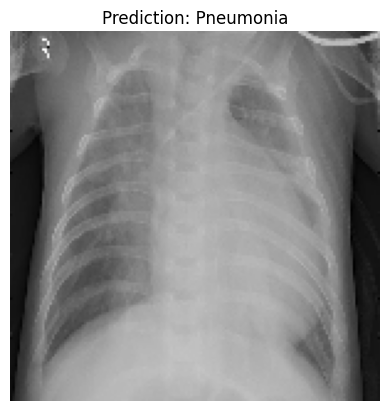

In [13]:
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.title(f"Prediction: {'Pneumonia' if prediction[0] > 0.5 else 'Normal'}")
plt.show()
